# Prior predictive checking

In [7]:
import arviz as az
import jax.numpy as jnp
import numpy as np
import numpyro
import numpyro.distributions as dist
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from jax import random
from numpyro import diagnostics, infer

rng_key = random.PRNGKey(0)

# Logistic regression

In [38]:
def logistic_regression(x, y=None):
    _, x_dim = x.shape
    w = numpyro.sample("w", dist.Normal(jnp.zeros(x_dim), jnp.ones(x_dim)))
    y_bar = 1 / (1 + jnp.exp(-(w * x).sum(-1)))
    numpyro.deterministic("y_bar", y_bar)
    numpyro.sample("y", dist.Bernoulli(y_bar), obs=y)

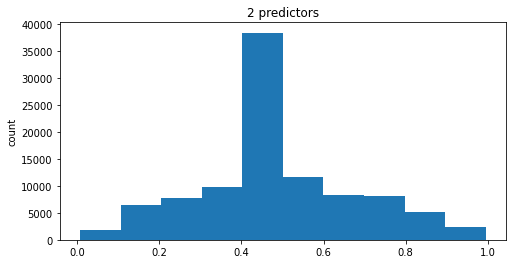

In [43]:
batch = 100
x_dim = 2
rng_key, rng_key_x = random.split(rng_key)
x = dist.Bernoulli(0.5 * jnp.ones((batch, x_dim))).sample(rng_key)

rng_key, rng_key_prior = random.split(rng_key)
predictive = infer.Predictive(logistic_regression, num_samples=1000)
prior = predictive(rng_key_prior, x)

plt.figure(figsize=(8, 4))
plt.hist(prior["y_bar"].ravel())
plt.title(f"{x_dim} predictors")
plt.ylabel("count")
plt.show()

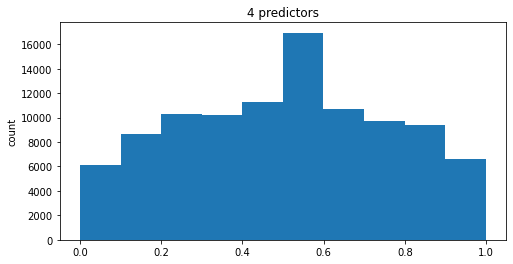

In [45]:
batch = 100
x_dim = 4
rng_key, rng_key_x = random.split(rng_key)
x = dist.Bernoulli(0.5 * jnp.ones((batch, x_dim))).sample(rng_key)

rng_key, rng_key_prior = random.split(rng_key)
predictive = infer.Predictive(logistic_regression, num_samples=1000)
prior = predictive(rng_key_prior, x)

plt.figure(figsize=(8, 4))
plt.hist(prior["y_bar"].ravel())
plt.title(f"{x_dim} predictors")
plt.ylabel("count")
plt.show()

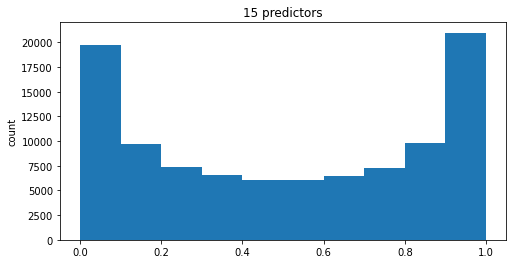

In [44]:
batch = 100
x_dim = 15
rng_key, rng_key_x = random.split(rng_key)
x = dist.Bernoulli(0.5 * jnp.ones((batch, x_dim))).sample(rng_key)

rng_key, rng_key_prior = random.split(rng_key)
predictive = infer.Predictive(logistic_regression, num_samples=1000)
prior = predictive(rng_key_prior, x)

plt.figure(figsize=(8, 4))
plt.hist(prior["y_bar"].ravel())
plt.title(f"{x_dim} predictors")
plt.ylabel("count")
plt.show()